1. **PassengerId**: This is a unique identifier assigned to each passenger in the dataset. It's a way to uniquely identify individual passengers.

2. **Survived**: This column indicates whether a passenger survived or not. It typically contains binary values, where 0 might represent not survived and 1 might represent survived.

3. **Pclass**: This represents the passenger class or ticket class. It's often used as a proxy for the socio-economic status of the passenger. It can have values like 1, 2, or 3, where 1 might correspond to a higher class (first class) and 3 might correspond to a lower class (third class).

4. **Name**: The name of the passenger. This column provides the full name including the first name, last name, and potentially other titles or honorifics.

5. **Sex**: The gender of the passenger. It can be either "male" or "female," indicating the biological sex of the passenger.

6. **Age**: The age of the passenger. It represents how old the passenger is in years. This can be a floating-point number to include fractional ages.
    
7. **SibSp**: This refers to the number of siblings or spouses aboard the ship that the passenger had. It counts both brothers/sisters and husbands/wives.

8. **Parch**: This represents the number of parents or children aboard the ship that the passenger had. It counts both parents and children.

9. **Ticket**: The ticket number associated with the passenger. This number can be used to identify the specific ticket issued to the passenger.

10. **Fare**: The fare or price paid by the passenger for their ticket. It represents how much the passenger paid for their journey.

11. **Cabin**: The cabin number where the passenger stayed during the journey. This can indicate the physical location of the passenger's accommodations on the ship.

12. **Embarked**: This column indicates the port of embarkation for the passenger. It could have values like "C" for Cherbourg, "Q" for Queenstown, and "S" for Southampton, representing different ports where passengers boarded the ship.

These columns seem to be related to a dataset used for analysis, often in the context of the Titanic dataset, where predictions might be made about the likelihood of a passenger surviving based on various features like class, age, sex, etc. It's worth noting that the dataset columns might vary in other contexts, but this explanation aligns with common scenarios.



In [134]:
#data Manipulation
import pandas as pd

#Mathematical operation
import numpy as np

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [135]:
df = pd.read_csv(r"D:\Datasets\titanic_dataset.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## This dataset consist 891 rows and 12 Columns

In [137]:
#checkinhg null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### There are 177 null valus in Age column, 2 null values in Embarked column and 687 null values in Cabin column

In [138]:
df.duplicated().sum()

0

## No duplicates in the dataset

In [139]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [140]:
df['Age'].mean()

29.69911764705882

In [141]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

### I fill all the null values present in Age column by its mean

In [142]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [144]:
df['Embarked'].fillna('S',inplace=True)

In [145]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


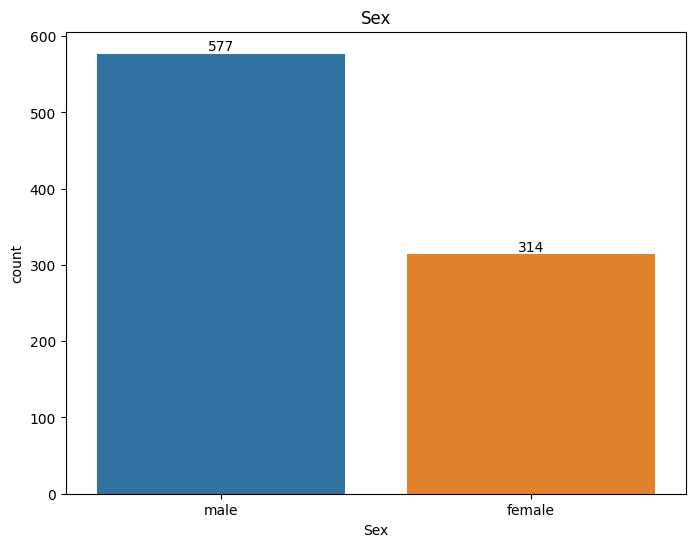

In [146]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,x='Sex')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Sex')
plt.xlabel('Sex')
plt.show()

**From this plot we see that there are 577 male and 314 female in our data**

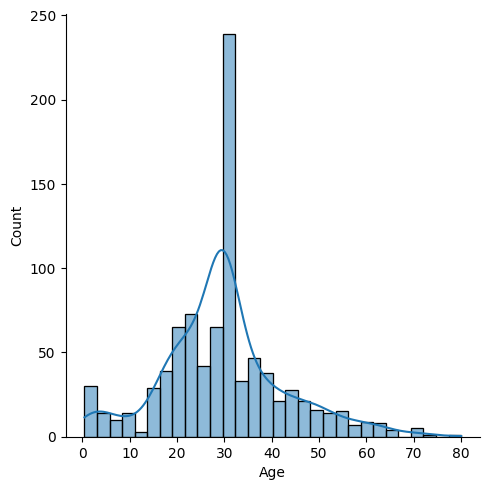

In [147]:
sns.displot(data = df, x = 'Age',kde = True)

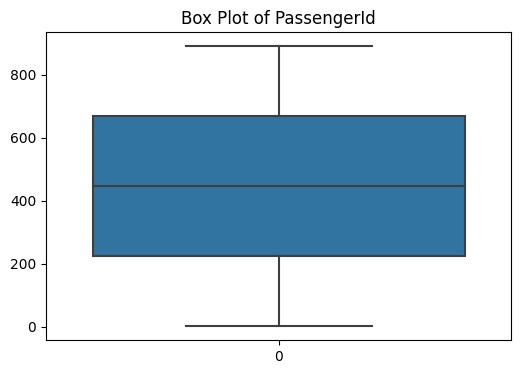

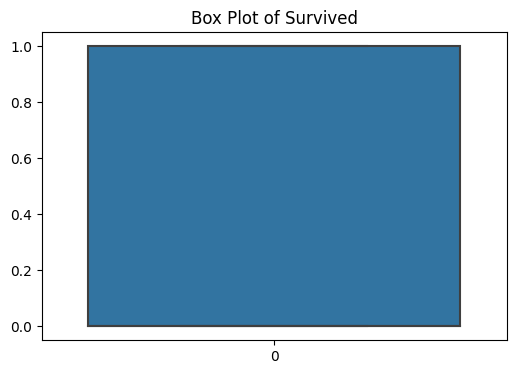

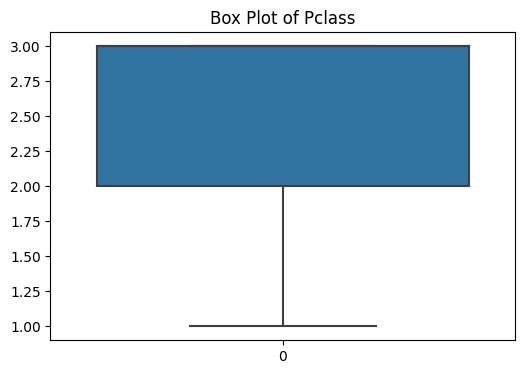

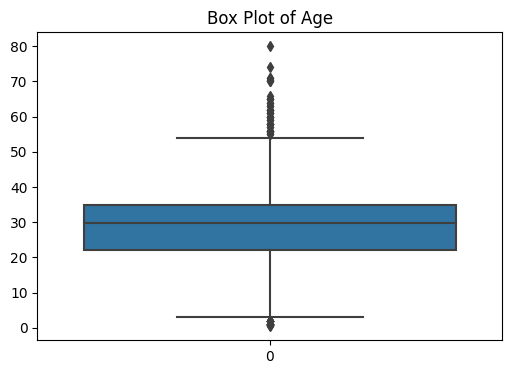

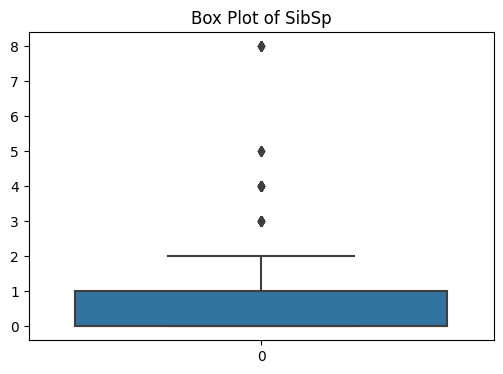

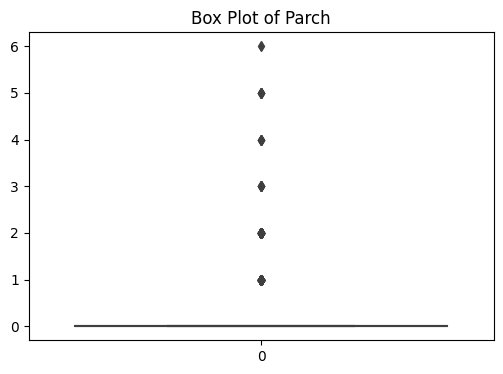

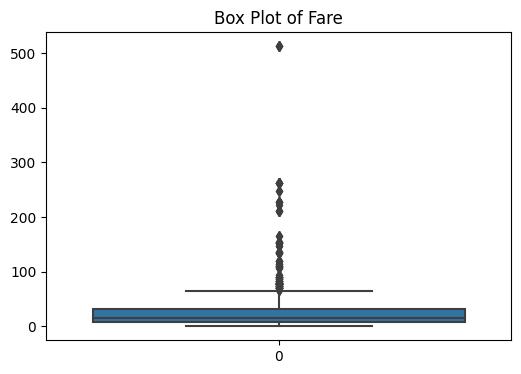

In [148]:
df_data = df.select_dtypes(include = np.number)
for i in df_data:
    plt.figure(figsize =(6,4))
    sns.boxplot(df_data[i])
    plt.title(f"Box Plot of {i}")
    plt.show()

In [149]:
# df[df['Age'] == df['Age'].max()]   #check outliers
# df.drop(630,inplace = True)     #drop outliers
# df.drop(851,inplace = True)
# df.drop([96,493],inplace = True)
# df.drop(116,inplace = True)

In [150]:
# df[df['Age'] == df['Age'].min()]  
# df.drop(803,inplace = True)
# df.drop(755,inplace = True)
# df.drop([469,644],inplace = True)

In [151]:
mean = df['Age'].mean()
std = df['Age'].std()
lower_bound = mean - std*2
upper_bound = mean + std*2
exp = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)] 


In [152]:
df1 = exp.copy()

In [153]:
df1['Age'] = df1['Age'].astype(int)

In [175]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,2


## Machine Learning Part

In [154]:
df1['Sex'] = df1['Sex'].apply(lambda a: 1 if a == 'male' else 0)

In [155]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C


In [156]:
df1.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [157]:
df1['Embarked'] = df1['Embarked'].apply(lambda a: 1 if a == 'S' else 2 if a == 'C' else 3)

In [158]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,2


<Axes: >

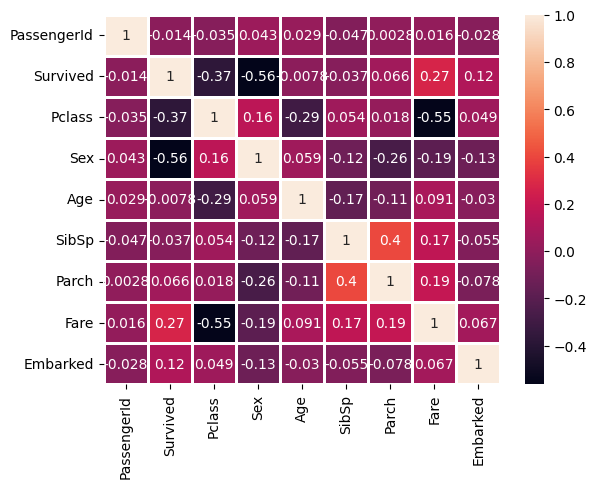

In [159]:
sns.heatmap(df1.corr(numeric_only = True),annot=True,linewidths=1)

In [160]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [169]:
x = df1[['PassengerId','Pclass','Sex','Age','SibSp','Parch', 'Embarked','Fare']]
y = df1['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =1)

In [170]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.37175743325242716, 0.9722222222222222, 'x[2] <= 0.5\ngini = 0.463\nsamples = 657\nvalue = [418, 239]'),
 Text(0.11468446601941748, 0.9166666666666666, 'x[1] <= 2.5\ngini = 0.384\nsamples = 224\nvalue = [58, 166]'),
 Text(0.038834951456310676, 0.8611111111111112, 'x[0] <= 48.0\ngini = 0.084\nsamples = 114\nvalue = [5, 109]'),
 Text(0.019417475728155338, 0.8055555555555556, 'x[0] <= 37.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.009708737864077669, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.02912621359223301, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05825242718446602, 0.8055555555555556, 'x[0] <= 502.0\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.04854368932038835, 0.75, 'x[3] <= 47.5\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(0.038834951456310676, 0.6944444444444444, 'x[0] <= 493.0\ngini = 0.092\nsamples = 62\nvalue = [3, 59]'),
 Text(0.02912621359223301, 0.6388888888888888, 'x[7] <= 26.125\ngini = 0.063\nsamples

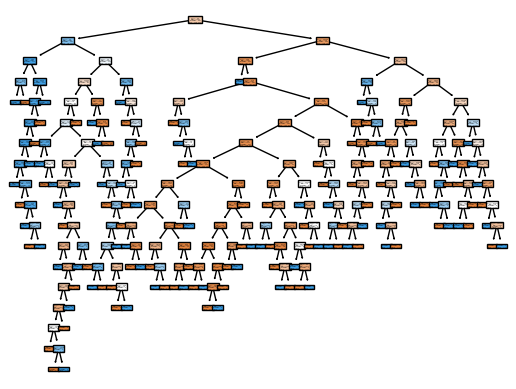

In [171]:
from sklearn import tree
tree.plot_tree(dtc,filled = True)


In [172]:
dtcp = dtc.predict(x_test)
accuracy_score(dtcp,y_test)

0.7151515151515152

In [165]:
# Support Vector Machine
svm_class = svm.SVC(kernel ='linear')
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [166]:
svm_predict = svm_class.predict(x_test)
accuracy_score(svm_predict,y_test)

0.7818181818181819

In [167]:
# Gaussian Native Bayes
gs = GaussianNB()
gs.fit(x_train,y_train)


GaussianNB()

In [168]:
gs_prediction = gs.predict(x_test)
accuracy_score(gs_prediction,y_test)

0.8181818181818182